In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Define random state
random_state = 2018
np.random.seed(random_state)
warnings.filterwarnings('ignore')

In [79]:
pd.options.display.max_rows = 6000
pd.options.display.max_columns = 80

data = pd.read_csv('./brazilian-cities/BRAZIL_CITIES.csv', sep=";", decimal=",")

##note que a df está sem a feature AREA e RURAL_URBAN

ft1 = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$", "IDHM Ranking 2010", "IDHM", "IDHM_Renda", "IDHM_Longevidade", "IDHM_Educacao", "LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df1 = data[ft1]

ft = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$","LONG", "LAT" ,"ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df = data[ft]

In [80]:
df['LONG'] = df['LONG'].astype(float)
df['LAT'] = df['LAT'].astype(float)
df['ALT'] = df['ALT'].astype(float)
#df['AREA'] = df['AREA'].astype(float)
#df['RURAL_URBAN'] = df['RURAL_URBAN'].astype(float)
df['GVA_AGROPEC'] = df['GVA_AGROPEC'].astype(float)
df['GVA_INDUSTRY'] = df['GVA_INDUSTRY'].astype(float)
df['GVA_SERVICES'] = df['GVA_SERVICES'].astype(float)
df['GVA_PUBLIC'] = df['GVA_PUBLIC'].astype(float)
df['TAXES'] = df['TAXES'].astype(float)
df['GDP'] = df['GDP'].astype(float)
#df['GDP_CAPITA'] = df['GDP_CAPITA'].astype(float)


In [81]:
df1['IDHM'] = df1['IDHM'].astype(float)

def get_rotulo(value):
    if value >= 0.8:
        return "muito_alto"
    elif 0.69 < value <= 0.79:
        return "alto"
    elif 0.59 < value <= 0.69:
        return "médio"
    elif 0.49 < value <= 0.59:
        return "baixo"
    else:
        return "muito_baixo"

df["rótulo"] = df1['IDHM'].apply(get_rotulo)

In [82]:
print(len(df.columns))

67


In [84]:
print(df.dtypes)

IBGE_RES_POP              float64
IBGE_RES_POP_BRAS         float64
IBGE_RES_POP_ESTR         float64
IBGE_DU                   float64
IBGE_DU_URBAN             float64
IBGE_DU_RURAL             float64
IBGE_POP                  float64
IBGE_1                    float64
IBGE_1-4                  float64
IBGE_5-9                  float64
IBGE_10-14                float64
IBGE_15-59                float64
IBGE_60+                  float64
IBGE_PLANTED_AREA         float64
IBGE_CROP_PRODUCTION_$    float64
LONG                      float64
LAT                       float64
ALT                       float64
PAY_TV                    float64
FIXED_PHONES              float64
ESTIMATED_POP             float64
GVA_AGROPEC               float64
GVA_INDUSTRY              float64
GVA_SERVICES              float64
GVA_PUBLIC                float64
TAXES                     float64
GDP                       float64
POP_GDP                   float64
MUN_EXPENDIT              float64
COMP_TOT      

In [85]:
df=  df.fillna(0)

In [86]:
#separação da classe em y
X = df.iloc[:, 0:65].values
y = df.iloc[:, 66].values

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
from sklearn.ensemble import RandomForestClassifier

#100 árvores
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7930622009569378

Feature ranking:
1. feature 16 (0.087564)
2. feature 15 (0.070678)
3. feature 19 (0.048380)
4. feature 5 (0.047139)
5. feature 37 (0.045266)
6. feature 59 (0.044444)
7. feature 32 (0.028916)
8. feature 1 (0.023467)
9. feature 42 (0.023408)
10. feature 0 (0.022062)
11. feature 20 (0.021899)
12. feature 38 (0.021866)
13. feature 29 (0.020453)
14. feature 27 (0.020330)
15. feature 13 (0.019646)
16. feature 47 (0.019613)
17. feature 17 (0.019564)
18. feature 3 (0.018637)
19. feature 60 (0.016273)
20. feature 14 (0.015675)
21. feature 25 (0.015241)
22. feature 18 (0.015053)
23. feature 22 (0.014137)
24. feature 21 (0.014035)
25. feature 24 (0.013911)
26. feature 43 (0.013474)
27. feature 8 (0.013341)
28. feature 23 (0.013219)
29. feature 36 (0.013120)
30. feature 10 (0.012718)
31. feature 40 (0.012051)
32. feature 9 (0.012009)
33. feature 12 (0.011740)
34. feature 30 (0.011290)
35. feature 41 (0.010944)
36. feature 11 (0.010765)
37. feature 26 (0.010345)
38. feature 35 (0.010331)
39. featur

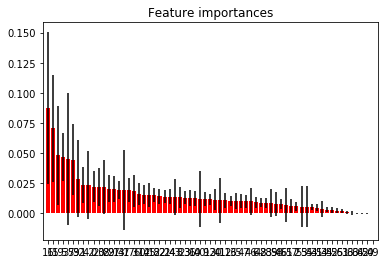

In [89]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

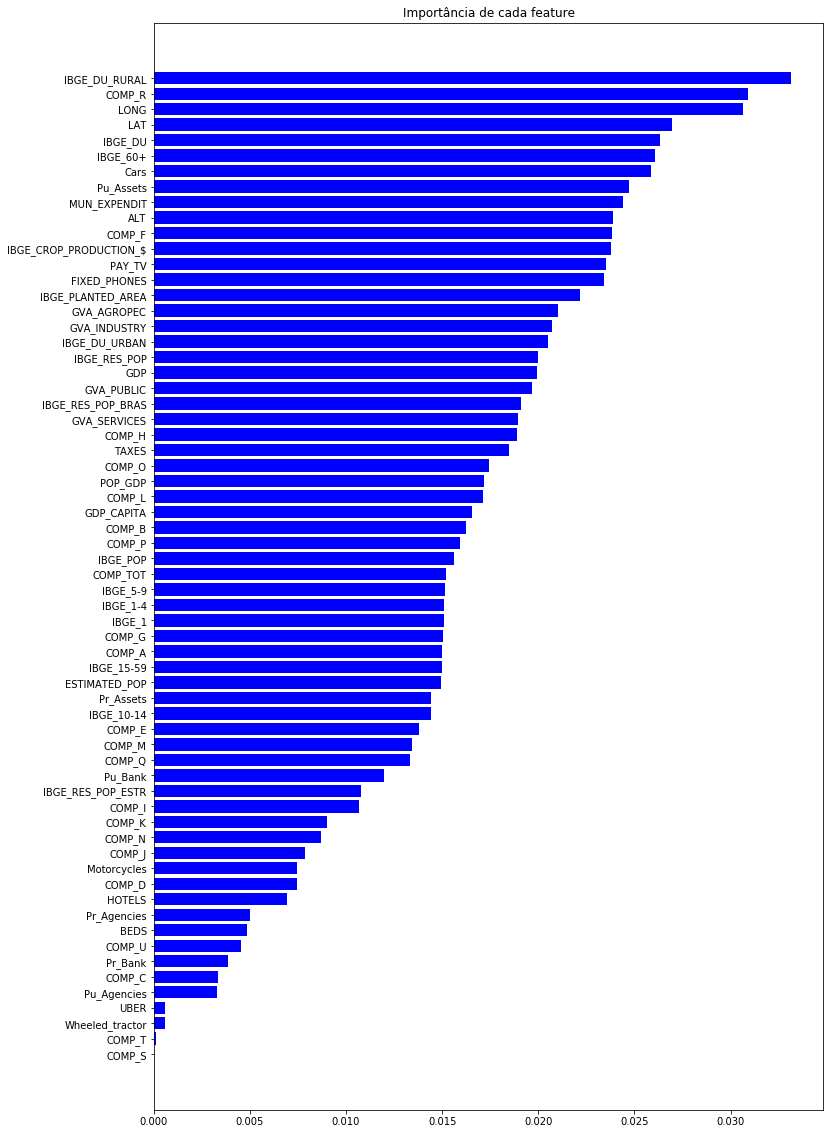

In [42]:
features = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$","LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 20))
plt.title('Importância de cada feature')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()


In [90]:
def metrics (y_test, y_pred):
  ac = accuracy_score(y_test, y_pred)
  rec = recall_score(y_test,y_pred, average= 'weighted')
  prec = precision_score(y_test,y_pred, average='weighted')
  return (ac, rec, prec)

In [91]:
acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)

acuracia = 0.7930622009569378 , recall = 0.7930622009569378 , precisao = 0.7928911000222467 


In [92]:
class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
                self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, 
                                     random_state = random_state).split(X, y))

        train_pred = np.zeros((X.shape[0], len(self.base_models)))
        test_pred = np.zeros((T.shape[0], len(self.base_models)* self.n_splits))
        f1_scores = np.zeros((len(self.base_models), self.n_splits))
        recall_scores = np.zeros((len(self.base_models), self.n_splits))
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
            
            for j, (train_idx, valid_idx) in enumerate(folds):
                
                X_train = X[train_idx]
                Y_train = y[train_idx]
                X_valid = X[valid_idx]
                Y_valid = y[valid_idx]
                
                clf.fit(X_train, Y_train)
                
                valid_pred = clf.predict(X_valid)
                recall  = recall_score(Y_valid, valid_pred, average='macro')
                f1 = f1_score(Y_valid, valid_pred, average='macro')
                
                recall_scores[i][j] = recall
                f1_scores[i][j] = f1
                
                train_pred[valid_idx, i] = valid_pred
                test_pred[:, test_col] = clf.predict(T)
                test_col += 1
                
                print( "Model- {} and CV- {} recall: {}, f1_score: {}".format(i, j, recall, f1))
            
        return train_pred, test_pred, recall_scores, f1_scores


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = random_state)

rdf = RandomForestClassifier(random_state = random_state) 
scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

params = {'max_depth': [6, 8, 10, 20], 
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf' : [4, 8, 12],
              'n_estimators' : [300, 400, 500]
             }

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 21.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=2018, verbose=0,
         